In [1]:
# importing necessary libraries
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading boston data:
boston_data = load_boston()
df = pd.DataFrame(data=boston_data.data,columns=boston_data.feature_names)
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [3]:
df.shape

(506, 13)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
dtypes: float64(13)
memory usage: 51.5 KB


In [5]:
# generating correlation matrix
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
CRIM,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621
ZN,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995
INDUS,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800
CHAS,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929
NOX,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879
RM,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808
AGE,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339
DIS,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996
RAD,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676
TAX,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993


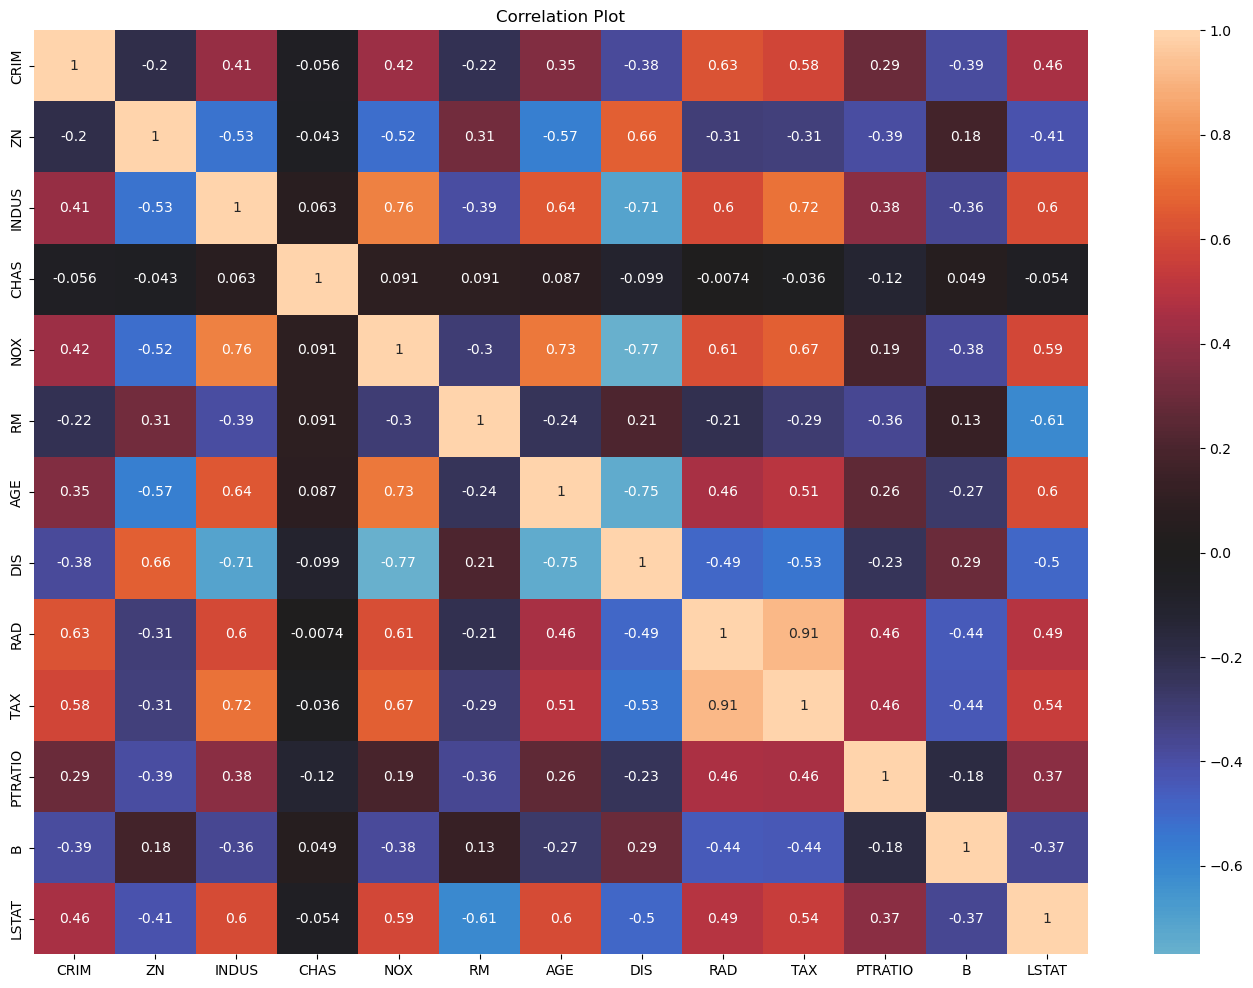

In [6]:
# visualizing the correlation:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True,center=0)
plt.title("Correlation Plot")
plt.show()

In [7]:
def get_correlated_columns(df,threshold=0.9):
    """
    A function that takes dataset and threshold value as input and returns all correlated columns based on the threshold.
    """
    correlated_columns = set()
    correlation_matrix = df.corr()
    all_columns = correlation_matrix.columns
    for i in range(len(correlation_matrix.columns)):
        for j in range (i):
            correlation_value = correlation_matrix.iloc[i,j]
            if abs(correlation_value) > threshold:
                print(all_columns[i],all_columns[j],correlation_value)
                column_name = correlation_matrix.columns[i]
                correlated_columns.add(column_name)
    return correlated_columns

In [10]:
correlated_columns = get_correlated_columns(df,0.7)

NOX INDUS 0.7636514469209139
AGE NOX 0.7314701037859592
DIS INDUS -0.7080269887427675
DIS NOX -0.7692301132258282
DIS AGE -0.747880540868632
TAX INDUS 0.7207601799515422
TAX RAD 0.9102281885331865


In [11]:
correlated_columns

{'AGE', 'DIS', 'NOX', 'TAX'}

In [12]:
df = df.drop(columns=list(correlated_columns))
df

,CRIM,ZN,INDUS,CHAS,RM,RAD,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,6.575,1.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,6.421,2.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,7.185,2.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,6.998,3.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,7.147,3.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,6.593,1.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,6.120,1.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,6.976,1.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,6.794,1.0,21.0,393.45,6.48


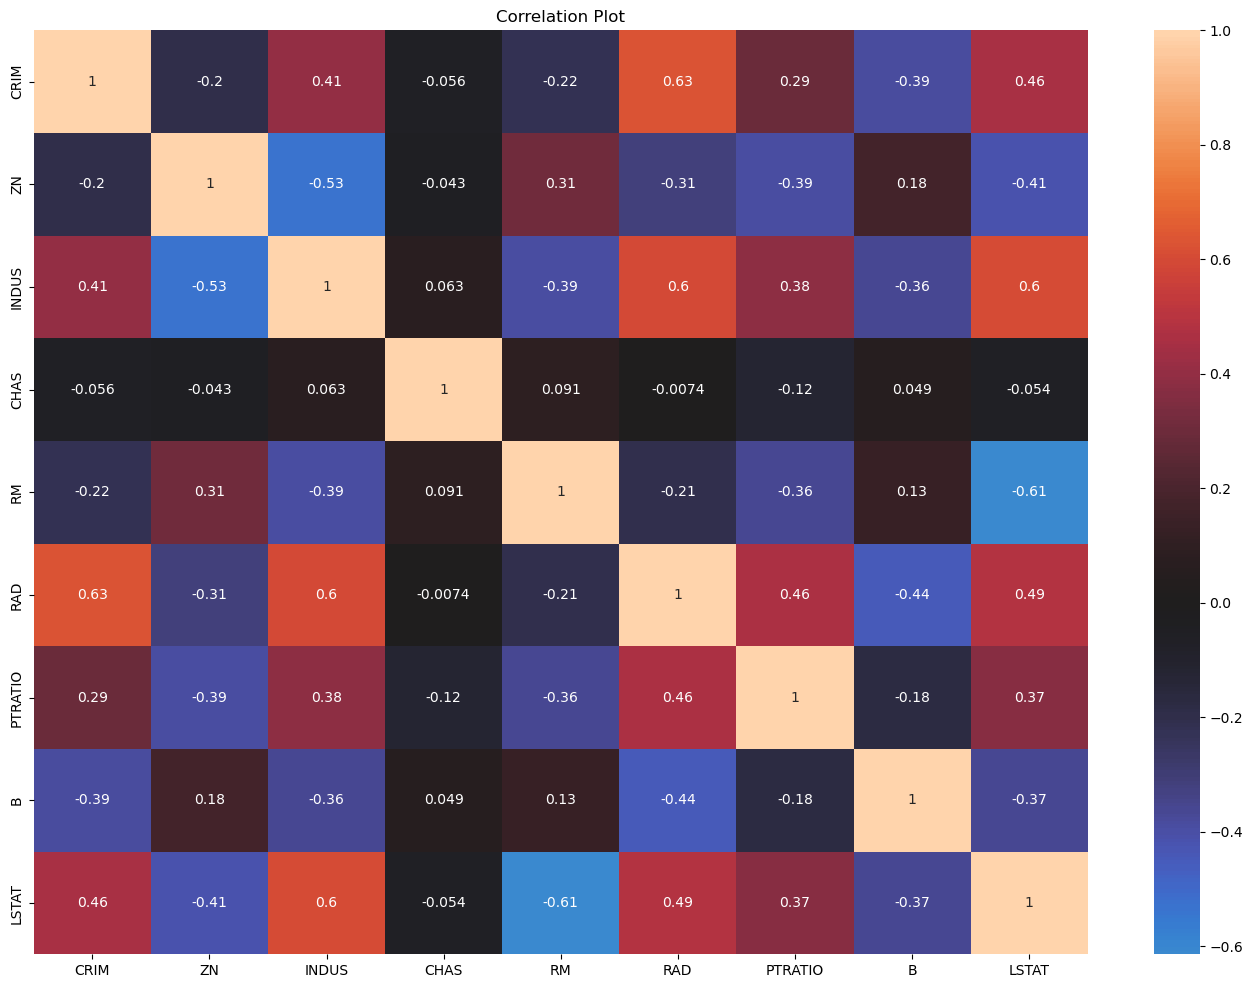

In [13]:
# visualizing correlation matrix:
plt.figure(figsize=(17,12))
sns.heatmap(df.corr(),annot=True,center=0)
plt.title("Correlation Plot")
plt.show()